# Data Wrangling Project

This is a section 2 final project by Eugene Masinde, a prospective Data Analyst working for Kaimosi Friends University in Vihiga county. It is done as part of the ALX/UDACITY Nano Degree in Data Analytics. You can reach me through any of the following:

<ul>
<li>Linkedin: https://www.linkedin.com/in/eugene-masinde-095bb343/</li>
<li>Email: odanga.masinde@gmail.com</li>
<li>Phone: +254727172822</li>
<li>Github: https://github.com/boygj</li>
</ul>


### Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#datacollection">Data Collection</a></li>
<li><a href="#assessing">Data Assessment</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#storing">Storing our Data</a></li>
<li><a href="#analysis">Data Analysis and Visualization</a></li>
</ul>


<a id='intro'></a>
## Introduction

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.


## Project Data
There are 3 main datasets that have been used for this project. They are:

#### 1. Enhanced Twitter Archive
The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, I have filtered for tweets with ratings only (there are 2356).

#### 2. Additional Data via the Twitter API
Back to the basic-ness of Twitter archives: retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data can be gathered by anyone from Twitter's API. Well, "anyone" who has access to data for the 3000 most recent tweets, at least. But you, because you have the WeRateDogs Twitter archive and specifically the tweet IDs within it, can gather this data for all 5000+. And guess what? You're going to query Twitter's API to gather this valuable data.

#### 3. Image Predictions File
One more cool thing: I ran every image in the WeRateDogs Twitter archive through a neural network that can classify breeds of dogs*. The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

<a id='datacollection'></a>
## Data Collection

There are three pieces of data that must be downloaded for this project

1. The twitter archive enhanced CSV file which is downloadable from the project material on the Udacity Classroom
2. The image predictions TSV file using the Requests Library
3. Querying the twitter API for data on the WeRateDogs Twitter archive using the Tweepy library and storing it in tweet_json.txt

The following section details how this is done

### DC1: Importing the twitter enhanced archive file and reading it as a dataframe

In [157]:
#read the csv file using pandas read_csv function
import pandas as pd
df_1=pd.read_csv('twitter-archive-enhanced.csv')


In [8]:
#Display the first 5 values using the head function
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### DC2: Programatically download the Twitter Image Predictions TSV file

In [9]:
#import relevant libraries

import requests

In [10]:
#get access to the image predictions file using requests library
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
response

<Response [200]>

In [12]:
#write response to a file

with open('image-predictions.tsv', 'wb') as file:
    file.write (response.content)

In [13]:
#import the image-predictions tsv file and store in a dataframe

df=pd.read_csv('image-predictions.tsv', sep='\t')

In [14]:
#Display the first 5 elements in the new dataframe
df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### DC3: Twitter API Query

In [133]:
#import required libraries

import configparser
import numpy as np
from matplotlib import pyplot as plt
import tweepy as tw
from timeit import default_timer as timer
import json

In [16]:
#It is highly recommended that we do not share our API key information with the project, as such, I will be calling the config.ini using configparser

configuration=configparser.ConfigParser()
configuration.read('config.ini')

['config.ini']

In [17]:
#Now that we have access to the config file, lets extract the data that we need

api_key=configuration['twitter']['api_key']
api_key_secret=configuration['twitter']['api_key_secret']

access_token=configuration['twitter']['access_token']
access_token_secret=configuration['twitter']['access_token_secret']

In [18]:
#once we have been able to read the file, we need to now autheniticate the app with the twitter API

authenticate= tw.OAuthHandler(api_key, api_key_secret)
authenticate.set_access_token(access_token, access_token_secret)

In [19]:
#Finally we create an API access instance

api=tw.API(authenticate, wait_on_rate_limit=True)

In [20]:
#assign the values of tweet_id to a varianle tweet_ids
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

2356

In [32]:
# Now to Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tw.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Rate limit reached. Sleeping for: 195


Success
901: 758740312047005698
Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success


Success
1153: 725786712245440512
Success
1154: 725729321944506368
Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
1177: 719991154352222208
Success
1178: 719704490224398336
Success
1179: 719551379208073216
Success
1180: 719367763014393856
Success
1181: 719339463458033665
Success
1182: 719332531645071360
Success
11

Success
1402: 699434518667751424
Success
1403: 699423671849451520
Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
1426: 697943111201378304
Success
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
1430: 697596423848730625
Success
1431: 697575480820686848
Success
14

Success
1651: 683515932363329536
Success
1652: 683498322573824003
Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
1675: 682259524040966145
Success
1676: 682242692827447297
Success
1677: 682088079302213632
Success
1678: 682059653698686977
Success
1679: 682047327939461121
Success
1680: 682032003584274432
Success
16

Rate limit reached. Sleeping for: 143


Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
18

Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
20

Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
23

In [22]:
#We are now going to convert the text file generated above into a data list with each tweet on a unique line

df_list=[]

with open ('tweet_json.txt') as file:
    for line in file:
        df_list.append(json.loads(line))

In [23]:
print(df_list[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [24]:
 #In this step, we need to extract from the datalist information that contains id, retweet count and favorite into a dataframe

tweet_data=pd.DataFrame(df_list, columns = ['id', 'retweet_count', 'favorite_count'])

In [25]:
tweet_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,6962,33671
1,892177421306343426,5268,29198
2,891815181378084864,3463,21958
3,891689557279858688,7182,36728
4,891327558926688256,7709,35122


In [26]:
tweet_data=tweet_data.rename(columns={'id': 'tweet_id'})
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [27]:
#Save the data to a scv file

tweet_data.to_csv('tweet_data.csv', index=False)

<a id='assessing'></a>
## Assessing Data

After gathering all three pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in the "Accessing Data" section in the wrangle_act.ipynb Jupyter Notebook.

You need to use two types of assessment:

Visual assessment: each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes. Once displayed, data can additionally be assessed in an external application (e.g. Excel, text editor).
Programmatic assessment: pandas' functions and/or methods are used to assess the data.

Some Definitions might help us clean this data:

1. Dirty Data: Data that has issues with data content including missing data, invalid data, inaccurate date or inconsistent data
2. Messy Data: Data that has issues with its structure (columns, rows or table)



### AD 1: Assessing Enhanced Twitter Archive Data

In [28]:
df_1.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1683,681694085539872773,NaN,NaN,2015-12-29 04:31:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a Benedoop Cumbersnatch. Seem...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681694085...,11,10,Bo,None,None,pupper,None
461,817536400337801217,NaN,NaN,2017-01-07 01:00:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Eugene &amp; Patti Melt. No matte...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817536400...,12,10,Eugene,None,None,None,None
376,828046555563323392,NaN,NaN,2017-02-05 01:04:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sailer. He waits on the roof for his o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828046555...,13,10,Sailer,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
2333,666337882303524864,NaN,NaN,2015-11-16 19:31:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an extremely rare horned Parthenon. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666337882...,9,10,an,None,None,None,None
1187,718460005985447936,NaN,NaN,2016-04-08 15:26:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Bowie. He's listening for underground squ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718460005...,9,10,Bowie,None,None,None,None
722,783085703974514689,NaN,NaN,2016-10-03 23:25:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Earl. He can't catch. Did his best tho...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/783085703...,11,10,Earl,None,None,None,None
1393,700029284593901568,NaN,NaN,2016-02-17 18:49:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coops. His ship is taking on water. So...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700029284...,10,10,Coops,None,None,None,None
1501,692142790915014657,6.920419e+17,4.196984e+09,2016-01-27 00:31:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These are some pictures of Teddy that further ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692142790...,13,10,None,None,None,None,None
570,801854953262350336,8.018543e+17,1.185634e+07,2016-11-24 18:28:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",.@NBCSports OMG THE TINY HAT I'M GOING TO HAVE...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None


In [32]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [31]:
#Check for any duplicated data in the table
df_1.duplicated().sum()

0

In [24]:
#Check for any values with null values
df_1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [34]:
#Since all values are scored on a scale of 10m check for values which do not have a denominator equivalent to 10
df_1[df_1.rating_denominator !=10].count()[0]

23

In [35]:
#Since all of the dogs are meant to have a rating that is equal to or greater than 10, check if there are any that have values less than 10
df_1[df_1.rating_numerator < 10].count()[0]

440

In [26]:
df_1.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [27]:
df_1.rating_denominator.describe()
#It appears that there are some denominators which have a value of 0

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [36]:
df_1[df_1.rating_denominator==0].tweet_id

313    835246439529840640
Name: tweet_id, dtype: int64

In [38]:
#Check if there are any invalid names for the dogs 
df_1.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

### AD 2: Assessing Tweet Image Prediction Data

In [29]:
tipred= pd.read_csv('image-predictions.tsv', sep='\t')

In [30]:
tipred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [42]:
tipred.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1836,837110210464448512,https://pbs.twimg.com/media/C54DS1kXQAEU5pS.jpg,1,Siberian_husky,0.767696,True,Eskimo_dog,0.217079,True,malamute,0.011657,True
1078,717790033953034240,https://pbs.twimg.com/media/CfYaOeMWQAAGfyP.jpg,1,car_mirror,0.819106,False,minibus,0.107383,False,cab,0.034846,False
927,702671118226825216,https://pbs.twimg.com/media/CcBjp2nWoAA8w-2.jpg,1,bloodhound,0.381227,True,Sussex_spaniel,0.212017,True,clumber,0.128622,True
110,667886921285246976,https://pbs.twimg.com/media/CUTPnPCW4AI7R0y.jpg,1,Pomeranian,0.800432,True,Pekinese,0.168445,True,Chihuahua,0.008950,True
1519,787717603741622272,https://pbs.twimg.com/media/Cu6I9vvWIAAZG0a.jpg,3,German_shepherd,0.992339,True,malinois,0.004920,True,kelpie,0.000853,True
1245,747512671126323200,https://pbs.twimg.com/media/Cl-yykwWkAAqUCE.jpg,1,Cardigan,0.111493,True,malinois,0.095089,True,German_shepherd,0.080146,True
1682,813910438903693312,https://pbs.twimg.com/media/C0uXObSXUAAIzmV.jpg,1,Siberian_husky,0.699355,True,Eskimo_dog,0.256433,True,Norwegian_elkhound,0.013189,True
2038,884876753390489601,https://pbs.twimg.com/media/DEe2tZXXkAAwyX3.jpg,1,chow,0.822103,True,Norwich_terrier,0.106075,True,Norfolk_terrier,0.037348,True
387,673352124999274496,https://pbs.twimg.com/media/CVg6L2hWIAAYuEb.jpg,1,golden_retriever,0.672808,True,Labrador_retriever,0.275885,True,kuvasz,0.022255,True
805,691756958957883396,https://pbs.twimg.com/media/CZmdSD8UcAAnY5R.jpg,1,Saint_Bernard,0.342571,True,boxer,0.289096,True,Pembroke,0.076463,True


In [55]:
tipred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [119]:
#CHeck for any duplicated values
tipred.duplicated().sum()

0

### AD 3: Assessing Tweet Data From API

In [121]:
tweet_data.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [58]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


### Tidiness Issues

1. Dog stage data has been seperated into 4 columns
2. The data in all three tables appears to be similar but is currently in 3 different dataframes

### Quality Issues

1. Since we only want original data, there appears to be 181 retweets in the dataset
2. Some dog names appear to be invalid such as none and starting with small letters
3. The tweet_id column is an integer instead of a string data type
4. Some ID's appear to be missing dog photos
5. Missing values in expanded_url column
6. p1, p2 and p3 data is seperated by hiphens
7. some of the label data under column p1, p2 and p3 start with lower case while others start with upper case
8. There are missing entires under retweet count column



<a id='cleaning'></a>
# Cleaning Data
 
 In the next step, we will be cleaning the data according to the issues that have been identified. First we must create copies of all of the original data.

In [74]:
#Create copies of the original data
clean_twarch=df_1.copy()
clean_twdata= tweet_data.copy()
clean_ip=tipred.copy()


T1. Dog stage data has been seperated into 4 seperate columns

#### Define

Merge the 4 seperate rows representing dog stages into 1 column called dog_stage

#### Code

In [75]:
#Extract all misplaced dog stage data into one column called dog_stage 
clean_twarch['dog_stage']= clean_twarch['text'].str.extract('(doggo|floofer|pupper|puppo)')
clean_twarch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,NaN


In [76]:
#Drop the extra columns
clean_twarch=clean_twarch.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'])

#### Test

In [77]:
clean_twarch.dog_stage.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stage, dtype: int64

T2: The data in all three tables appears to be similar but is currently in 3 different dataframes

#### Define

Merge all of the three dataframes into one using tweet_id as the basis

#### Code

In [78]:
#Merge the copied Tweet Archive dataframe to the tweet data and image predictions dataframes
clean_twarch=pd.merge(clean_twarch, clean_twdata, on='tweet_id', how='left')
clean_twarch=pd.merge(clean_twarch, clean_ip, on='tweet_id', how='left')

#### Test


In [79]:
clean_twarch.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [80]:
clean_twarch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   399 n

## Cleaning the quality issues

### q1: Since we only want original data, there appears to be 181 retweets in the dataset

#### Define
Drop all retweeted rows of data

#### Code

In [81]:
#Create a version of the dataframe that only has rows where retweeted statuses are empty
cleaned_twarch=clean_twarch[clean_twarch.retweeted_status_id.isnull()]
clean_twarch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   399 n

In [82]:
#Now that the data has no retween id data, drop the columns and related data for retweets
clean_twarch=clean_twarch.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])


#### Test

In [83]:
#The columns no longer exist in the data
clean_twarch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2356 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2356 non-null   object 
 4   source                 2356 non-null   object 
 5   text                   2356 non-null   object 
 6   expanded_urls          2297 non-null   object 
 7   rating_numerator       2356 non-null   int64  
 8   rating_denominator     2356 non-null   int64  
 9   name                   2356 non-null   object 
 10  dog_stage              399 non-null    object 
 11  retweet_count          2327 non-null   float64
 12  favorite_count         2327 non-null   float64
 13  jpg_url                2075 non-null   object 
 14  img_num                2075 non-null   float64
 15  p1  

### q2. Some dog names appear to be invalid such as none and a

#### Define
Convert all invalid names on NAN then extract actual named from text column in the dataframe

#### Code

In [84]:
#Check estimated number of entires with None as entry
clean_twarch.name.str.match('None').sum()

745

In [94]:
clean_twarch.name=clean_twarch.name.replace(regex=['^[a-z]+', 'None'], value=np.nan)

In [95]:
#Confirm numbe of null values in the column
clean_twarch.name.isnull().sum()

678

In [103]:
# Create a function to extract data from the text column

def function(text):
    txt=text.split()
    for word in txt:
        if word.lower()=='named':
            name_ind=txt.index(word)+1
            return txt[name_ind]
        else:
            pass
    return np.nan
            

In [104]:
clean_twarch.name=np.where(clean_twarch.name.isnull(), clean_twarch.text.apply(function), clean_twarch.name)

#### Test


In [105]:
#Confirm numbe of null values in the column
clean_twarch.name.isnull().sum()

654

In [106]:
#Check if any entires still exist with keyword None
clean_twarch.name.str.match('None').sum()

0

### q3. The tweet_id column is an integer instead of a string data type

#### Define

Convert tweet_id from integer to string. Since the tweet_id will not be used for computationsal purposes, it is best practive to convert to string

#### Code


In [85]:
#Convert tweet_id to string from int64. Check current status using info()

clean_twarch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2356 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2356 non-null   object 
 4   source                 2356 non-null   object 
 5   text                   2356 non-null   object 
 6   expanded_urls          2297 non-null   object 
 7   rating_numerator       2356 non-null   int64  
 8   rating_denominator     2356 non-null   int64  
 9   name                   2356 non-null   object 
 10  dog_stage              399 non-null    object 
 11  retweet_count          2327 non-null   float64
 12  favorite_count         2327 non-null   float64
 13  jpg_url                2075 non-null   object 
 14  img_num                2075 non-null   float64
 15  p1  

In [86]:
clean_twarch.tweet_id= clean_twarch.tweet_id.astype(str)

#### Test

In [87]:
clean_twarch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2356 non-null   object 
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2356 non-null   object 
 4   source                 2356 non-null   object 
 5   text                   2356 non-null   object 
 6   expanded_urls          2297 non-null   object 
 7   rating_numerator       2356 non-null   int64  
 8   rating_denominator     2356 non-null   int64  
 9   name                   2356 non-null   object 
 10  dog_stage              399 non-null    object 
 11  retweet_count          2327 non-null   float64
 12  favorite_count         2327 non-null   float64
 13  jpg_url                2075 non-null   object 
 14  img_num                2075 non-null   float64
 15  p1  

### q4: Some ID's appear to be missing dog photos

#### Define
Drop all rows that are missing photos

#### Code

In [88]:
clean_twarch=clean_twarch[clean_twarch.jpg_url.notnull()]

#### Test

In [107]:
clean_twarch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2075 non-null   object 
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              2075 non-null   object 
 4   source                 2075 non-null   object 
 5   text                   2075 non-null   object 
 6   expanded_urls          2075 non-null   object 
 7   rating_numerator       2075 non-null   int64  
 8   rating_denominator     2075 non-null   int64  
 9   name                   1421 non-null   object 
 10  dog_stage              338 non-null    object 
 11  retweet_count          2057 non-null   float64
 12  favorite_count         2057 non-null   float64
 13  jpg_url                2075 non-null   object 
 14  img_num                2075 non-null   float64
 15  p1  

### q5: Missing values in expanded_url column

#### Define
Missing values issue appears to have been resolved while solving other issues

#### Code
No code required for this section

#### Test


In [108]:
clean_twarch.expanded_urls.isnull().sum()

0

### q6: p1, p2 and p3 data is seperated by hiphens

#### Define
Remove all p1 data with underscores and replace with spaces

#### Code

In [113]:
clean_twarch.p1=clean_twarch.p1.str.replace('_', ' ')
clean_twarch.p2=clean_twarch.p2.str.replace('_', ' ')
clean_twarch.p3=clean_twarch.p3.str.replace('_', ' ')

#### Test

In [114]:
clean_twarch.p1.sample(10)

456     miniature schnauzer
1599             Great Dane
396                Pekinese
122                Pembroke
59                 Pembroke
1714           space heater
51         golden retriever
37                 malamute
1478           dining table
2161             toy poodle
Name: p1, dtype: object

### q7: some of the label data under column p1, p2 and p3 start with lower case while others start with upper case

#### Define
Replace all lowercase p entries with upper case

#### Code

In [115]:
clean_twarch.p1=clean_twarch.p1.str.title()
clean_twarch.p2=clean_twarch.p2.str.title()
clean_twarch.p3=clean_twarch.p3.str.title()

#### Test

In [116]:
clean_twarch.p1.sample(10)

2064    Labrador Retriever
2171        Siberian Husky
1186           Maltese Dog
1862    Labrador Retriever
1018                 Dingo
1839     Italian Greyhound
810                 Collie
1656              Pembroke
447                 Prison
280                  Swing
Name: p1, dtype: object

### q8: There are missing entires under retweet count column

#### Define
Drop all null entries under retweet count

#### Code

In [124]:
#Check number of null values under retweet count
clean_twarch.retweet_count.isnull().sum()

18

In [125]:
# Delete these null entries
clean_twarch=clean_twarch[clean_twarch.retweet_count.notnull()]

#### Test

In [126]:
#Check number of null values under retweet count after deleting
clean_twarch.retweet_count.isnull().sum()

0

In [128]:
clean_twarch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2057 non-null   object 
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              2057 non-null   object 
 4   source                 2057 non-null   object 
 5   text                   2057 non-null   object 
 6   expanded_urls          2057 non-null   object 
 7   rating_numerator       2057 non-null   int64  
 8   rating_denominator     2057 non-null   int64  
 9   name                   1410 non-null   object 
 10  dog_stage              334 non-null    object 
 11  retweet_count          2057 non-null   float64
 12  favorite_count         2057 non-null   float64
 13  jpg_url                2057 non-null   object 
 14  img_num                2057 non-null   float64
 15  p1  

<a id='storing'></a>
# Step 4: Storing Data

In this sction, we will be saving the edited dataframe as a csv file

In [129]:
clean_twarch.to_csv('twitter_archive_master.csv')

<a id='analysis'></a>
# Step 5: Data Analysis and Visualization
In this section, we will be performing data analysis and vizualization on the final data frame that was cleaned in the above steps

#### 1. Relationship between the number of retweets and number of favorites

The question to note here is, is there any direct corellation between the number of times a tweet has been retweeted and the number of people who have considered those dog photos to be their favoties?
retweet count data and favorite count data has been used for this insight.

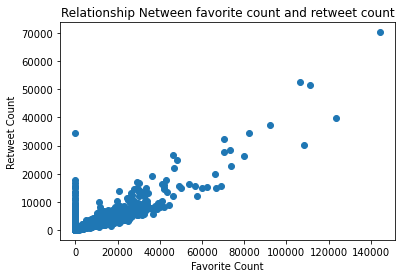

In [137]:
plt.scatter(clean_twarch.favorite_count, clean_twarch.retweet_count)
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')
plt.title('Relationship Netween favorite count and retweet count')
plt.show()

#### Insight: 
From the scatter plot above, it is apparent that there is a linear relationship between dog posts that people favorite and those that they retweet

#### 2. Relationship between retweets and dog stage
The question here is, which dog stage has the highest number of retweets?
Dog stage data and retweet count data has been used for this insight


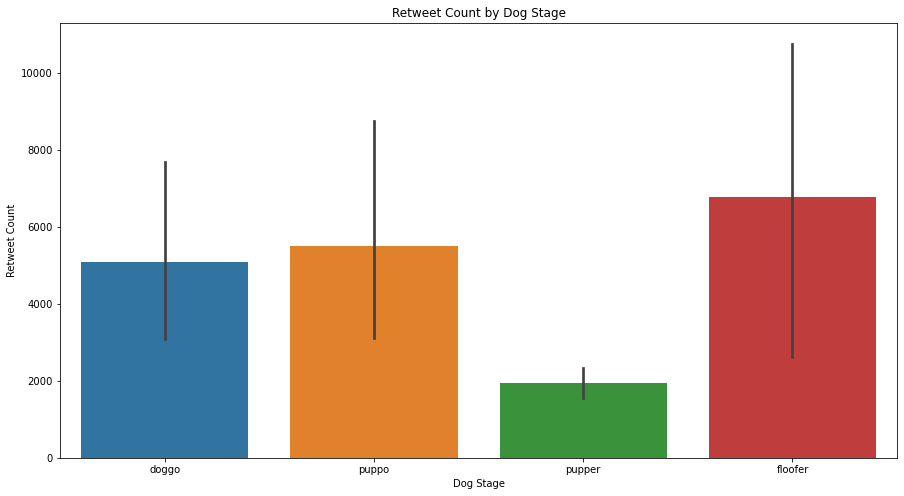

In [143]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.barplot(y='retweet_count', x='dog_stage', data=clean_twarch)
plt.title('Retweet Count by Dog Stage')
plt.xlabel('Dog Stage')
plt.ylabel('Retweet Count')
plt.show()

#### Insight:
From the visualizations, we can see that dogs in the floofer stage have the most retweets while dogs in the pupper stage have the least number of retweets on average.

#### 3. What percentages are higher for the various posts relative to dog stages?
The questions to answer here would be, which dog stage has the highest number of posts, and which one the lowest?
dog-stage data has been used to generate this insight.


In [146]:
dog_stage_df=clean_twarch.dog_stage.value_counts()
dog_stage_df

pupper     230
doggo       73
puppo       28
floofer      3
Name: dog_stage, dtype: int64

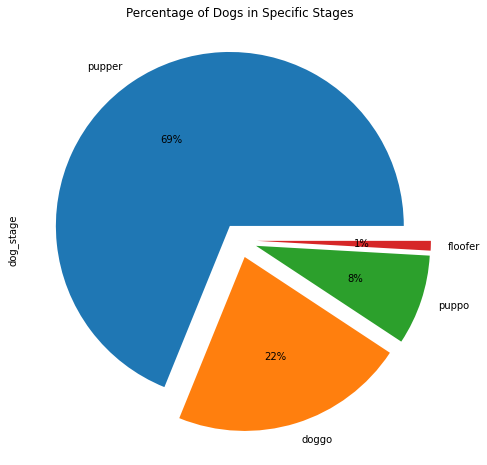

In [156]:
clean_twarch.dog_stage.value_counts().plot(kind='pie', figsize= (8,8), autopct='%1.0f%%', explode=(0.1, 0.1, 0.1, 0.1));
plt.title('Percentage of Dogs in Specific Stages')

plt.show()

#### Insight
From the pie chart we can see that there 69% of all tweeted dogs belong to the pupper stage, while only 1% belong to the Floofer stage. Therefore the largest stage represended is Pupper while the smallest stage respresented is Floofer